In [110]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [111]:
#import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.0 Understand the Data

##### 1.1 Read the CSV file provided by consumer finance company for analysis

In [112]:
loan_df = pd.read_csv('loan.csv')

#review the dataframe
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


##### 1.2 Understand Meta Data
- Total number of records in loan_df is 39717
- Total number of Columns in loan_df is 111

In [113]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [114]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [115]:
loan_df.shape

(39717, 111)

In [116]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### 2.0 Data Cleaning

##### 2.1 Remove all the null's and NA column from the Dataframe
- Fetch all the column stats on null values
- Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
- Drop the columns where majority of data is null say 90%
- Drop the columns which has no significance in the analysis 

In [117]:
#Fetch all the column stats on null values
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


In [118]:
#Drop all the columns which has all the null or NA values ,as this will not help us in the analysis
loan_df.dropna(axis='columns',how='all',inplace=True)

In [119]:
#analyse the dataframe ,whether the column actually dropped or not
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2458
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12939
purpose                           0
title                            10
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [120]:
# 54 columns are dropped out of 111 
loan_df.shape

(39717, 57)

In [121]:
# find the percentage of nulls or NA in the columns 
round(loan_df.isnull().sum()/len(loan_df.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     0.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [122]:
#find the columns whose total percentage of null values is 90%
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 90]

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [123]:
#drop the columns whose total percentage of null values is 90%
loan_df.drop(loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 90], axis=1,inplace=True)

In [124]:
#analyse the dataframe again 
 ## 2 more column is dropped 
loan_df.shape

(39717, 55)

In [125]:
#again check for whose
loan_df.columns[(loan_df.isnull().sum()/len(loan_df.index)) *100 > 0]

Index(['emp_title', 'desc', 'title', 'mths_since_last_delinq', 'revol_util',
       'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [126]:
# drop the columns which does not have any significance in the analsysis
  ## desc - Loan description provided by the borrower
  ## url  - URL for the LC page with listing data
loan_df.drop(['desc','url'], axis=1,inplace=True)

In [127]:
#analyse the dataframe again
loan_df.shape

(39717, 53)

In [128]:
#check the missing values in the rows 
  #as of now dont know ,whether the null columns is been used for the analysis or not ,so ignoring this TODO
loan_df[loan_df.isnull().sum(axis=1)>5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39659,121568,121574,4000,4000,1925.0,36 months,9.64%,128.41,B,B4,...,129.76,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39660,121535,121373,2800,2800,1625.0,36 months,8.70%,88.65,B,B1,...,89.80,Aug-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


##### 2.2 Make the datatype consistent across dataframe
- Fetch all the column stats on null values

In [129]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [130]:
#since the int_rate is object and contain symbol percentage ,better to remove that 
loan_df['int_rate']=pd.to_numeric(loan_df.int_rate.apply(lambda x: x.strip('%')))

In [131]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [132]:
# emp_length also contain characters , we can make that to integer.By removing the years and the + synmbol
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('years'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('+'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('<'))
#loan_df['emp_length'] = loan_df.emp_length.apply(lambda x: x.strip('>'))

In [138]:
# emp_length also contain characters , we can make that to integer.By removing the years and the + synmbol
# remove  the  nulls from the dataframe
loan_df = loan_df[pd.notnull(loan_df['emp_length'])]

In [140]:
# change the type of the column to int
loan_df['emp_length']=loan_df['emp_length'].str.extract('(\d+)').fillna(0).astype(int)

In [141]:
# analyse the dataframe 
loan_df['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

In [142]:
#check the datatype of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null int64
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [144]:
#export loan_data 
loan_df.to_csv("loan_data_chkpt1.csv", sep='\t', encoding='ISO-8859-1')

### 3.0 Data Analysis

##### 3.1 For Data Analysis , create a subset dataframe from the loans whose status is not "Current"
- For the data analysis ,Loans in Current status does not give insites about the Problem statement ,hence filtering that 

In [151]:
#before filtering the dataframe shape is 
loan_df.shape

(39717, 53)

In [146]:
#create a subset dataframe from the loans whose status is not "Current"
loan_not_current_df = loan_df[loan_df['loan_status']!= 'Current']

In [185]:
#analyse the new dataframe shape
loan_not_current_df.shape

(38577, 53)

In [188]:
# Total Defaulter percentage 14.6%
(len(loan_not_current_df[loan_not_current_df['loan_status']=='Charged Off'].index)/len(loan_not_current_df.index))*100

14.586411592399617

##### 3.2 Univariate Analysis 


###### 3.2.1 Unordered Categorical Variables - Univariate Analysis
- loan_status --rank-frequency plots
- term
- home_ownership
- verification
- purpose

In [179]:
def draw_countplot(column_name,count_text,title,df):
  sns.set(style="darkgrid")
  plt.figure(figsize=(14,8))
  plt.title(title)
  ax =sns.countplot(x=column_name, data=df)
  ax.set(xlabel='Loan Status', ylabel=count_text)

  for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

  plt.show()

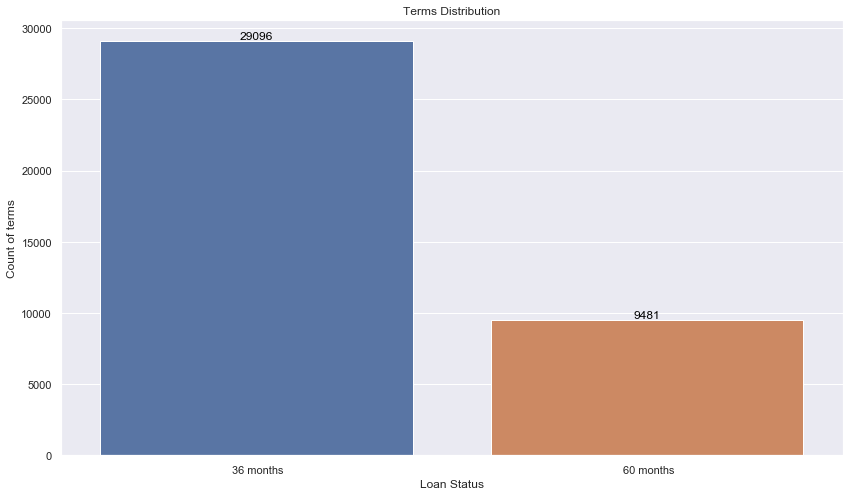

In [180]:
draw_countplot('term','Count of terms','Terms Distribution',loan_not_current_df)

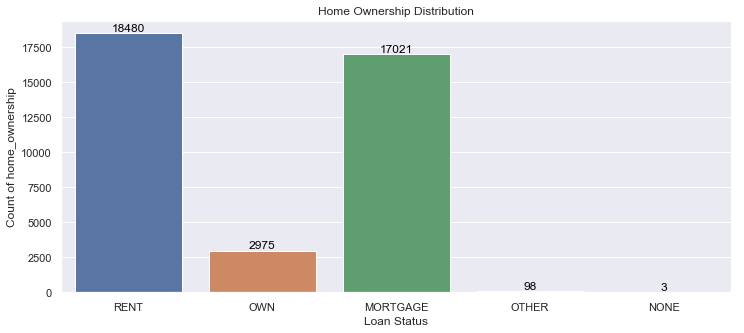

In [175]:
draw_countplot('home_ownership','Count of home_ownership','Home Ownership Distribution',loan_not_current_df)

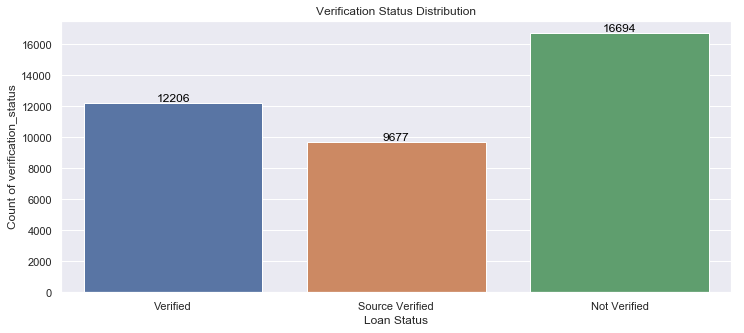

In [177]:
draw_countplot('verification_status','Count of verification_status','Verification Status Distribution',loan_not_current_df)

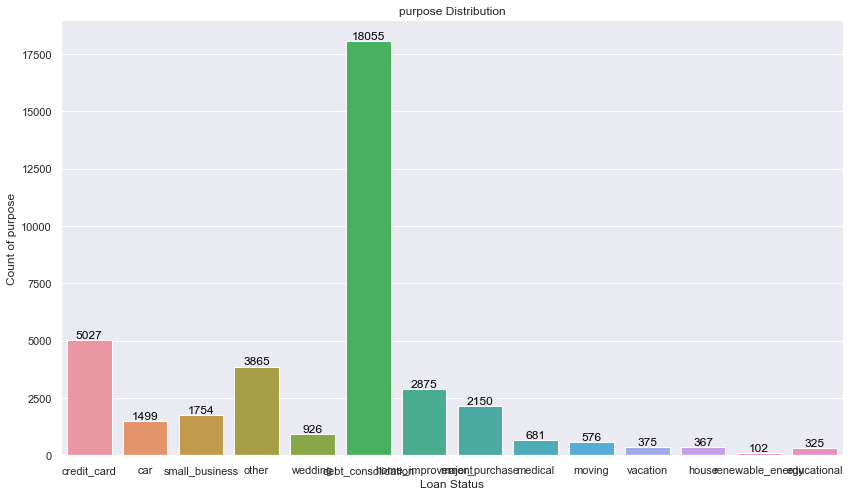

In [181]:
draw_countplot('purpose','Count of purpose','Purpose Distribution',loan_not_current_df)

###### 3.2.2 Ordered Categorical Variables - Univariate Analysis
- Grade
- Sub Grade

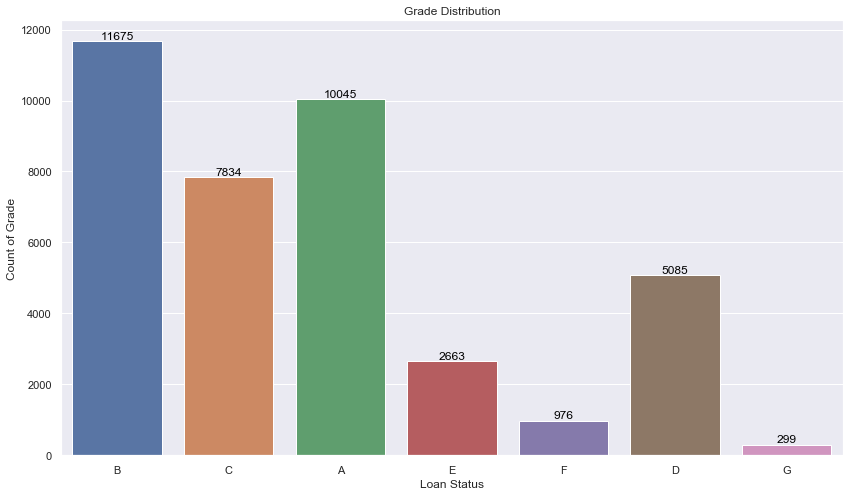

In [183]:
draw_countplot('grade','Count of Grade','Grade Distribution',loan_not_current_df)

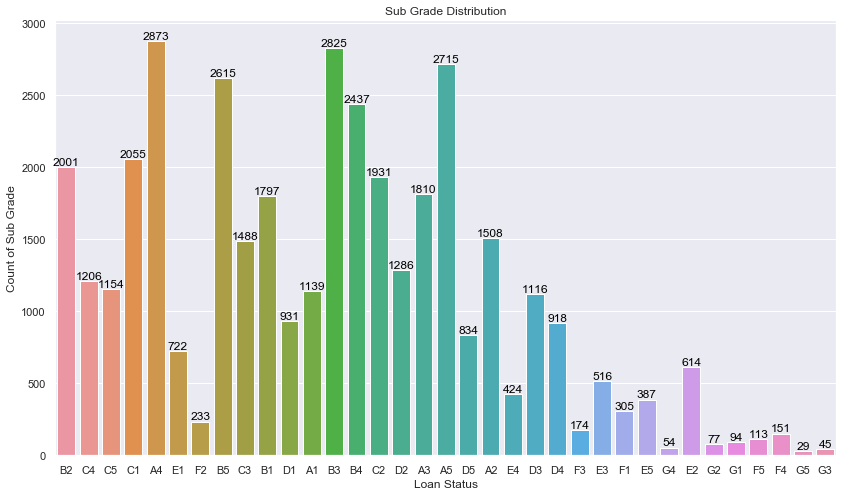

In [184]:
draw_countplot('sub_grade','Count of Sub Grade','Sub Grade Distribution',loan_not_current_df)

###### 3.2.3 Segmented Univariate Analysis